<a href="https://colab.research.google.com/github/kenyam1979/simple-CNN-MNIST/blob/main/Test_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras test with MNIST on Colab GPU


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

##Data preprocessing

In [ ]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]

In [ ]:
X_train = np.asarray(X_train)
X_train = np.reshape(X_train, (20000, 28, 28))

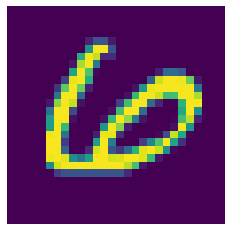

In [ ]:
img = X_train[0]
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
X_train = X_train.astype('float32')
X_train /= 255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

##Model build

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers.core import Dense, Activation, Dropout, Flatten

model=Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Fitting

In [ ]:

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2)

Epoch 1/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3087 - accuracy: 0.8995 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0947 - accuracy: 0.9698 - val_loss: 0.0591 - val_accuracy: 0.9830
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.0693 - accuracy: 0.9783 - val_loss: 0.0626 - val_accuracy: 0.9818
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0426 - val_accuracy: 0.9875
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.0436 - accuracy: 0.9853 - val_loss: 0.0528 - val_accuracy: 0.9843
Epoch 6/20
500/500 [==============================] - 10s 20ms/step - loss: 0.0385 - accuracy: 0.9871 - val_loss: 0.0359 - val_accuracy: 0.9895
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0495 - val_accuracy: 0.985

## Model evaluation with test data

In [ ]:
df = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = df.iloc[:, 1:]
y_test = df.iloc[:, 0]

In [ ]:
X_test = X_test.astype('float32')
X_test /= 255.0

In [ ]:
X_test = np.asarray(X_test)
X_test = np.reshape(X_test, (10000, 28, 28))

In [ ]:
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0241 - accuracy: 0.9934 - 2s/epoch - 7ms/step
